## Libs

In [ ]:
!pip install webdataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cat /content/drive/MyDrive/iNatSound/archive_part_aa /content/drive/MyDrive/iNatSound/archive_part_ab /content/drive/MyDrive/iNatSound/archive_part_ac /content/drive/MyDrive/iNatSound/archive_part_ad /content/drive/MyDrive/iNatSound/archive_part_ae /content/drive/MyDrive/iNatSound/archive_part_af /content/drive/MyDrive/iNatSound/archive_part_ag /content/drive/MyDrive/iNatSound/archive_part_ah

Streaming output truncated to the last 5000 lines.
�21QC�el
	L�?Y�VK��K�K�#M�� �I�	��Lp�a5��LMV�Z�A�樞��%e�\a�z�jj��H�����K3�J�*נ%��jZBY�6$W�l���R"a>P�L+A�"�N��ȒЗ,"��,@�HLWH��j`�8�Ie�T����3�#�C��+3�F�7��@�Yd�R�x���
��k}��A�R�	�i�e��pOQ1�!*x��ܘ�U�z�6�
���8B1,��:�����p�ܑXw����*o�j��]+��u��5�zQd�j(�F�! �* �� "�֦룷���.U�(�s8�qCRئQ�1�X/��y,M@�7pK���1��,93���<�/���"L�7��@e�UG{�D�I40N50��bॶI`����%���#��ϓ���E�a��3Dr���,�t��6'�ZaÜ��� �6#��@��B",O��ed	��h�V�@h�m�6Ym@�p���s�:z����D��T�-EDXQI�`ͦE&	Cg0B)`=ū�7�׭�Ɩ$+�D^ (�1E���7��`@��M�Xi�W�vm��P��*����0�w҃
=�$xe
\ArX U��1�i02V�E�S�_���)EYˆ �8��
�&p?���nR�6s��I-�����P�aH`��g�
^�,�V�VMA�E���Ҍo��!�
Ö%]�H����M�]�P�W<Ey
� 2�����rU��WjbkQ�T	�?S%X'�a���",X�)�a��%\�v\����uZrl'�$�F�c�qP�aK��k���I����Dj�qJQy`W�$�*�B��� L��ڶLˆl(�h4�8�����9M��TC��5|�Ty�p=��q��@���+� �͋��y�VgM[�T���/��%Q�Qq=��������
	)
#�9Qpc]���(+�.�I��6�0�ӵl]�n��

In [ ]:
!tar -xvzf "/content/drive/MyDrive/iNatSound/spectrogram_archive.tar.gz"

home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/
home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/test/
home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/test/test-000000.tar
home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/test/test-000001.tar
home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/test/test-000002.tar
home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/test/test-000003.tar
home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/test/test-000004.tar
home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/test/test-000005.tar
home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/test/test-000006.tar
home/azureuser/cloudfiles/code/Users

### See .tar archive content

In [ ]:
!tar -tf /content/drive/MyDrive/dataset/sharded_data/train/train-000000.tar

tar: /content/drive/MyDrive/dataset/sharded_data/train/train-000000.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import webdataset as wds
import torch
help(wds.WebDataset)

Help on class WebDataset in module webdataset.compat:

class WebDataset(webdataset.pipeline.DataPipeline, FluidInterface)
 |  WebDataset(urls, handler=<function reraise_exception at 0x7c39b0359080>, mode=None, resampled=False, repeat=False, shardshuffle=None, cache_size=-1, cache_dir=None, url_to_name=<function pipe_cleaner at 0x7c3ab45ba840>, detshuffle=False, nodesplitter=<function single_node_only at 0x7c39b035b2e0>, workersplitter=<function split_by_worker at 0x7c39b035b380>, select_files=None, rename_files=None, empty_check=True, verbose=False, seed=None)
 |
 |  Create a WebDataset pipeline for efficient data loading.
 |
 |  This class sets up a data pipeline for loading and processing WebDataset-format data.
 |  It handles URL generation, shard shuffling, caching, and sample grouping.
 |
 |  Args:
 |      urls: The source URLs or specifications for the dataset.
 |      handler: Function to handle exceptions. Defaults to reraise_exception.
 |      mode: The mode of operation. Defa

In [ ]:
!echo "train: "
!ls "/content/home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/train" | grep ".tar" | wc -l
!echo "val: "
!ls "/content/home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/val" | grep ".tar" | wc -l
!echo "test: "
!ls "/content/home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/test" | grep ".tar" | wc -l

train: 
1605
val: 
170
test: 
107


## Preprocessing

In [ ]:

# 1. Define your custom decoder
def decode_raw_spectrogram(key, data):

    """
    Decodes raw bytes into a numpy array based on known shape/dtype.
    """
    # Only apply this logic to .npy extensions
    if key.endswith(".npy"):
        try:
            # 1. Convert raw bytes to numpy array of the correct type
            # Your script used .astype(np.uint8), so we must read as uint8
            flat_array = np.frombuffer(data, dtype=np.uint8)

            # 2. Reshape to the known dimensions
            # Your script targeted (224, 224)
            flat_array = flat_array.reshape((224, 224))
            multi_dimensional_array = np.stack([flat_array]*3, axis = 0)

            # (Optional) Handle the 'stack=True' case if you ever used it:
            return multi_dimensional_array
        except Exception as e:
            print(f"Error decoding {key}: {e}")
            return None
    if key.endswith(".txt"):
        return data.decode("utf-8")
    # Return other data (like .txt labels) as-is
    return data

#2. Spectogram scaling
def apply_spectogram_scaling(sample_tuple):

    # sample_tuple will be (spec_npy, label_txt) after decode_raw_spectrogram and to_tuple
    spec_npy, label_txt = sample_tuple

    # Convert numpy array (uint8) to PyTorch Tensor (float)
    # Scale to [0, 1] first, as torchvision.transforms.Normalize expects this range.
    spec_tensor = torch.from_numpy(spec_npy).float() / 255.0

    # Normalize the tensor
    #normalize_transform = transforms.Normalize(mean=MEAN, std=STD)
    #spec_tensor = normalize_transform(spec_tensor)


    # Return spec_tensor and label
    return spec_tensor, label_txt

In [ ]:
url = "/content/home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/train" + "/train-{000000..001604}.tar"
train_dataset = wds.WebDataset(url, shardshuffle=True).decode(decode_raw_spectrogram).to_tuple("spec.npy", "label.txt").map(apply_spectogram_scaling)

/usr/local/lib/python3.12/dist-packages/webdataset/compat.py:381: UserWarning: set WebDataset(shardshuffle=...) to a positive integer or 0 or False
  warnings.warn("set WebDataset(shardshuffle=...) to a positive integer or 0 or False")


## Mean and Covariance

In [ ]:
aggregated_data = []
count=0
for spec,_ in train_dataset:
  count+=1
  data = spec[0,:].numpy().flatten()
  aggregated_data = np.concatenate((aggregated_data, data), axis=0)
  if count == 1000:
    break

KeyboardInterrupt: 

In [ ]:
mean = 0.4865824173198487
std =  0.1773556497486759

print(f"Mean: {mean}, Std: {std}")
MEAN=np.stack([mean]*3)
STD=np.stack([std]*3)


Mean: 0.4865824173198487, Std: 0.1773556497486759


In [ ]:
def apply_spectogram_normalization(sample_tuple):
    spec_tensor, label_txt = sample_tuple
    normalize_transform = transforms.Normalize(mean=MEAN,std=STD)
    spec_tensor = normalize_transform(spec_tensor)
    return spec_tensor, label_txt

## Apply spectogram normalization

In [ ]:
train_dataset = train_dataset.map(apply_spectogram_normalization)

Label: 960fb54e-969f-4824-9458-e963872b7075_spectrogram_chunk_6.npy
Shape: torch.Size([3, 224, 224])


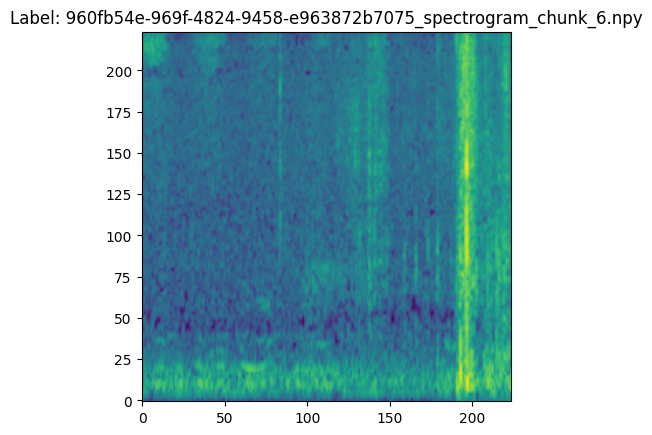

In [ ]:
import numpy as np
import io
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# 3. Verify it works
for spec, label in train_dataset:
    print(f"Label: {label}")
    print(f"Shape: {spec.shape}")  # Should be (224, 224)

    # Visualize
    plt.imshow(spec[0,:], cmap='viridis',origin='lower')
    plt.title(f"Label: {label}")
    plt.show()
    break


In [ ]:
sample = next(iter(train_dataset))
print(sample)
print(f"Type of sample: {type(sample)}")
print(f"Number of elements in sample: {len(sample)}")
print(f"Type of spectrogram (first element): {type(sample[0])}")
print(f"Shape of spectrogram: {sample[0].shape}")
print(f"Type of label (second element): {type(sample[1])}")
print(f"Content of label: {sample[1]}")

(tensor([[[ 0.4626, -0.3555, -0.5103,  ...,  0.7500,  0.6174,  0.5510],
         [ 0.5953, -0.1344, -0.2007,  ...,  0.7943,  0.6395,  0.5510],
         [ 0.7943,  0.2415,  0.3299,  ...,  0.8827,  0.6616,  0.5289],
         ...,
         [ 0.1752,  0.3963,  0.6616,  ...,  0.7943,  0.6174,  0.2857],
         [ 0.1088,  0.3078,  0.3742,  ...,  0.6837,  0.5068,  0.0646],
         [ 0.0867,  0.2636,  0.1973,  ...,  0.6174,  0.4405, -0.0902]],

        [[ 0.4626, -0.3555, -0.5103,  ...,  0.7500,  0.6174,  0.5510],
         [ 0.5953, -0.1344, -0.2007,  ...,  0.7943,  0.6395,  0.5510],
         [ 0.7943,  0.2415,  0.3299,  ...,  0.8827,  0.6616,  0.5289],
         ...,
         [ 0.1752,  0.3963,  0.6616,  ...,  0.7943,  0.6174,  0.2857],
         [ 0.1088,  0.3078,  0.3742,  ...,  0.6837,  0.5068,  0.0646],
         [ 0.0867,  0.2636,  0.1973,  ...,  0.6174,  0.4405, -0.0902]],

        [[ 0.4626, -0.3555, -0.5103,  ...,  0.7500,  0.6174,  0.5510],
         [ 0.5953, -0.1344, -0.2007,  ...,  

## Test and validation datasets


In [ ]:
validation_dataset = wds.WebDataset("/content/home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/val" + "/val-{000000..000169}.tar", shardshuffle=True).decode(decode_raw_spectrogram).to_tuple("spec.npy", "label.txt").map(apply_spectogram_scaling).map(apply_spectogram_normalization)
test_dataset = wds.WebDataset("/content/home/azureuser/cloudfiles/code/Users/Bratfalean.Ra.Dragos/iNatSounds/dataset/sharded_data/test" + "/test-{000000..000106}.tar", shardshuffle=True).decode(decode_raw_spectrogram).to_tuple("spec.npy", "label.txt").map(apply_spectogram_scaling).map(apply_spectogram_normalization)

/usr/local/lib/python3.12/dist-packages/webdataset/compat.py:381: UserWarning: set WebDataset(shardshuffle=...) to a positive integer or 0 or False
  warnings.warn("set WebDataset(shardshuffle=...) to a positive integer or 0 or False")


In [ ]:
sample = next(iter(validation_dataset))
print(sample)
print(f"Type of sample: {type(sample)}")
print(f"Number of elements in sample: {len(sample)}")
print(f"Type of spectrogram (first element): {type(sample[0])}")
print(f"Shape of spectrogram: {sample[0].shape}")
print(f"Type of label (second element): {type(sample[1])}")
print(f"Content of label: {sample[1]}")

(tensor([[[ 1.3028,  0.9048,  1.0154,  ...,  1.1702,  0.2636,  0.5953],
         [ 1.5018,  1.2144,  1.2365,  ...,  1.3913,  0.6616,  0.7722],
         [ 1.8114,  1.7229,  1.5903,  ...,  1.7672,  1.3249,  1.0375],
         ...,
         [-2.3234, -2.3234, -2.3455,  ..., -2.4119, -1.9033, -1.7485],
         [-2.3013, -2.3898, -2.4561,  ..., -2.4561, -1.9918, -1.8370],
         [-2.2792, -2.4340, -2.5003,  ..., -2.4782, -2.0360, -1.9033]],

        [[ 1.3028,  0.9048,  1.0154,  ...,  1.1702,  0.2636,  0.5953],
         [ 1.5018,  1.2144,  1.2365,  ...,  1.3913,  0.6616,  0.7722],
         [ 1.8114,  1.7229,  1.5903,  ...,  1.7672,  1.3249,  1.0375],
         ...,
         [-2.3234, -2.3234, -2.3455,  ..., -2.4119, -1.9033, -1.7485],
         [-2.3013, -2.3898, -2.4561,  ..., -2.4561, -1.9918, -1.8370],
         [-2.2792, -2.4340, -2.5003,  ..., -2.4782, -2.0360, -1.9033]],

        [[ 1.3028,  0.9048,  1.0154,  ...,  1.1702,  0.2636,  0.5953],
         [ 1.5018,  1.2144,  1.2365,  ...,  

## Model Architecture

In [ ]:
!pip install vit-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.8/72.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 10.2 MB/s eta 0:00:00


## Model Pretraining

In [ ]:
# This cell is now redundant as its content has been moved to cell YBDm1wfIJBzy. You may delete it.

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

class SpectrogramMAE(nn.Module):
    def __init__(
        self,
        patch_size=16,
        embed_dim=768,           # ViT-B standard
        decoder_embed_dim=512,   # Decoder is usually narrower
        decoder_depth=8,
        decoder_num_heads=16,
        mask_ratio=0.75
    ):
        super().__init__()

        # --------------------------------------------------------------------------
        # 1. Standard ViT-B/16 Encoder
        # --------------------------------------------------------------------------
        # 3 channels, 224x224 is the native ViT format.
        # We load it without weights (training from scratch on audio data).
        self.vit = models.vit_b_16(weights=None)

        # No modification to conv_proj or pos_embedding needed!
        # They fit (3, 224, 224) inputs by default.

        # --------------------------------------------------------------------------
        # 2. MAE Decoder
        # --------------------------------------------------------------------------
        self.decoder_embed = nn.Linear(embed_dim, decoder_embed_dim, bias=True)
        self.mask_token = nn.Parameter(torch.zeros(1, 1, decoder_embed_dim))

        # Number of patches = (224/16)^2 = 14*14 = 196
        self.num_patches = (224 // patch_size) ** 2

        # Decoder Position Embeddings (196 patches + 1 CLS token)
        self.decoder_pos_embed = nn.Parameter(
            torch.zeros(1, self.num_patches + 1, decoder_embed_dim), requires_grad=False
        )

        decoder_layer = nn.TransformerEncoderLayer(
            d_model=decoder_embed_dim,
            nhead=decoder_num_heads,
            dim_feedforward=decoder_embed_dim * 4,
            batch_first=True,
            norm_first=True
        )
        self.decoder = nn.TransformerEncoder(decoder_layer, num_layers=decoder_depth)

        # 3 Channels * 16 * 16 = 768 pixels per patch
        self.decoder_pred = nn.Linear(
            decoder_embed_dim, patch_size**2 * 3, bias=True
        )

        # --------------------------------------------------------------------------
        # 3. Setup
        # --------------------------------------------------------------------------
        self.patch_size = patch_size
        self.mask_ratio = mask_ratio
        self.initialize_weights()

    def initialize_weights(self):
        # Initialize decoder pos embed and mask token
        nn.init.trunc_normal_(self.decoder_pos_embed, std=0.02)
        nn.init.normal_(self.mask_token, std=0.02)

        # Initialize linear layers (Xavier)
        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)

    def patchify(self, imgs):
        """
        imgs: (N, 3, 224, 224)
        x: (N, 196, 16*16*3)
        """
        p = self.patch_size
        h = imgs.shape[2] // p
        w = imgs.shape[3] // p

        # Reshape to (N, 3, 14, 16, 14, 16)
        x = imgs.reshape(imgs.shape[0], 3, h, p, w, p)
        # Permute to (N, 14, 14, 16, 16, 3)
        x = torch.einsum('nchpwq->nhwpqc', x)
        # Flatten patches: (N, 196, 768)
        x = x.reshape(imgs.shape[0], h * w, p**2 * 3)
        return x

    def unpatchify(self, x):
        """
        Reconstruct image from patches (for visualization)
        x: (N, 196, 16*16*3) -> imgs: (N, 3, 224, 224)
        """
        p = self.patch_size
        h = 224 // p
        w = 224 // p

        x = x.reshape(x.shape[0], h, w, p, p, 3)
        x = torch.einsum('nhwpqc->nchpwq', x)
        imgs = x.reshape(x.shape[0], 3, h * p, w * p)
        return imgs

    def random_masking(self, x, mask_ratio):
        """
        x: [N, L, D] sequence
        """
        N, L, D = x.shape
        len_keep = int(L * (1 - mask_ratio))

        noise = torch.rand(N, L, device=x.device)

        # Sort noise
        ids_shuffle = torch.argsort(noise, dim=1)
        ids_restore = torch.argsort(ids_shuffle, dim=1)

        # Keep first 'len_keep'
        ids_keep = ids_shuffle[:, :len_keep]
        x_masked = torch.gather(x, dim=1, index=ids_keep.unsqueeze(-1).repeat(1, 1, D))

        # Generate binary mask: 0 is keep, 1 is remove
        mask = torch.ones([N, L], device=x.device)
        mask[:, :len_keep] = 0
        mask = torch.gather(mask, dim=1, index=ids_restore)

        return x_masked, mask, ids_restore

    def forward_encoder(self, x):
        # 1. Patch Embed (Standard ViT path)
        # [B, 3, 224, 224] -> [B, 768, 14, 14]
        x = self.vit.conv_proj(x)
        # [B, 768, 14, 14] -> [B, 196, 768]
        x = x.flatten(2).transpose(1, 2)

        # 2. Add Pos Embed (drop CLS for now)
        x = x + self.vit.encoder.pos_embedding[:, 1:, :]

        # 3. Masking
        x, mask, ids_restore = self.random_masking(x, self.mask_ratio)

        # 4. Append CLS token
        cls_token = self.vit.class_token + self.vit.encoder.pos_embedding[:, :1, :]
        cls_tokens = cls_token.expand(x.shape[0], -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)

        # 5. Transformer Encoder blocks
        x = self.vit.encoder.dropout(x)
        x = self.vit.encoder.layers(x)
        x = self.vit.encoder.ln(x)

        return x, mask, ids_restore

    def forward_decoder(self, x, ids_restore):
        # Project to decoder dim
        x = self.decoder_embed(x)

        # Append mask tokens
        mask_tokens = self.mask_token.repeat(x.shape[0], ids_restore.shape[1] + 1 - x.shape[1], 1)
        x_ = torch.cat([x[:, 1:, :], mask_tokens], dim=1)

        # Unshuffle
        x_ = torch.gather(x_, dim=1, index=ids_restore.unsqueeze(-1).repeat(1, 1, x.shape[2]))

        # Add CLS back
        x = torch.cat([x[:, :1, :], x_], dim=1)

        # Decoder Pos Embed
        x = x + self.decoder_pos_embed

        # Transformer Decoder blocks
        x = self.decoder(x)

        # Predict pixels
        x = self.decoder_pred(x)

        # Remove CLS
        x = x[:, 1:, :]
        return x

    def forward_loss(self, imgs, pred, mask):
        """
        imgs: [N, 3, 224, 224]
        pred: [N, 196, 768]
        mask: [N, 196]
        """
        target = self.patchify(imgs)

        # Norm targets per patch
        mean = target.mean(dim=-1, keepdim=True)
        var = target.var(dim=-1, keepdim=True)
        target = (target - mean) / (var + 1.e-6)**.5

        loss = (pred - target) ** 2
        loss = loss.mean(dim=-1)  # [N, L], mean loss per patch

        # Calculate mean loss only on masked patches
        loss = (loss * mask).sum() / mask.sum()
        return loss

    def forward(self, imgs):
        latent, mask, ids_restore = self.forward_encoder(imgs)
        pred = self.forward_decoder(latent, ids_restore)
        loss = self.forward_loss(imgs, pred, mask)
        return loss, pred, mask

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.cuda.amp import GradScaler, autocast
import math
import os
import datetime

# --------------------------------------------------------------------------
# 1. Configuration & Hyperparameters
# --------------------------------------------------------------------------

class Config:
    # Data
    batch_size = 64
    num_workers = 16
    image_size = (224, 224)
    # New: Limit batches per epoch (set to None to process all batches)
    batches_per_epoch_train = 2500 # Example: 100 to process 100 batches per training epoch
    batches_per_epoch_val = 200  # Example: 20 to process 20 batches per validation epoch

    # Optimization
    epochs = 100
    warmup_epochs = 10
    base_lr = 1.5e-4       # Rule of thumb: base_lr * (batch_size / 256)
    weight_decay = 0.05
    betas = (0.9, 0.95)    # ViT usually requires lower beta2 than standard Adam

    # System
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    save_every = 2        # Save checkpoint every N epochs

# --------------------------------------------------------------------------
# 2. Learning Rate Scheduler (Cosine + Linear Warmup)
# --------------------------------------------------------------------------

def adjust_learning_rate(optimizer, epoch, config):
    """Decay the learning rate with half-cycle cosine after warmup"""
    if epoch < config.warmup_epochs:
        lr = config.base_lr * (epoch + 1) / config.warmup_epochs
    else:
        # Cosine decay
        lr = config.base_lr * 0.5 * (1. + math.cos(math.pi * (epoch - config.warmup_epochs) / (config.epochs - config.warmup_epochs)))

    for param_group in optimizer.param_groups:
        param_group["lr"] = lr
    return lr

# --------------------------------------------------------------------------
# 4. Training Engine
# --------------------------------------------------------------------------

def train_one_epoch(model, data_loader, optimizer, scaler, epoch, config):
    model.train()
    total_loss = 0
    num_batches_processed = 0

    # Update LR for this epoch
    lr = adjust_learning_rate(optimizer, epoch, config)

    print(f"\n[Epoch {epoch+1}/{config.epochs}] Starting... (LR: {lr:.6f})")

    for batch_idx, data in enumerate(data_loader):
        imgs, _ = data
        imgs = imgs.to(config.device)

        # Mix Precision Context
        with autocast():
            # Model returns loss directly
            loss, _, _ = model(imgs)

        # Optimization Step
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()
        num_batches_processed += 1

        # Logging
        if batch_idx % 20 == 0:
            print(f" Batch {batch_idx} Loss: {loss.item():.4f}")

        if cfg.batches_per_epoch_train is not None and num_batches_processed >= cfg.batches_per_epoch_train:
            break

    avg_loss = total_loss / num_batches_processed
    print(f"-> Epoch {epoch+1} Done. Avg Loss: {avg_loss:.4f}")
    return avg_loss


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.cuda.amp import GradScaler, autocast
import math
import os
import datetime
import re # Import regular expression module

# --------------------------------------------------------------------------
# 5. Main Execution
# --------------------------------------------------------------------------

if __name__ == "__main__":

    # 1. Load Configuration
    cfg = Config()

    # 2. Prepare Model
    model = SpectrogramMAE()
    model.to(cfg.device)

    # 3. Prepare Optimizer
    eff_batch_size = cfg.batch_size
    cfg.base_lr = cfg.base_lr * eff_batch_size / 256

    param_groups = [
        {'params': [p for n, p in model.named_parameters() if p.requires_grad]}
    ]

    optimizer = optim.AdamW(
        param_groups,
        lr=cfg.base_lr,
        weight_decay=cfg.weight_decay,
        betas=cfg.betas
    )

    # Mixed Precision Scaler
    scaler = GradScaler()

    # --- Resume from checkpoint logic ---
    start_epoch = 0

    # Find the latest checkpoint in the directory (or a specified directory)
    checkpoint_files = [f for f in os.listdir('/content/drive/MyDrive/iNatSound/checkpoints') if re.match(r'checkpoints_\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}', f)]
    print(checkpoint_files)
    latest_checkpoint_dir = None


    if checkpoint_files:
        # Sort to find the latest directory based on timestamp
        checkpoint_files.sort()
        latest_checkpoint_dir = os.path.join('/content/drive/MyDrive/iNatSound/checkpoints/', checkpoint_files[-1])

        # Now find the latest .pth file within that directory
        if latest_checkpoint_dir and os.path.exists(latest_checkpoint_dir):
            model_checkpoints = [f for f in os.listdir(latest_checkpoint_dir) if f.startswith('mae_spectrogram_checkpoint_ep_') and f.endswith('.pth')]
            if model_checkpoints:
                # Extract epoch numbers to find the latest
                latest_epoch = -1
                latest_checkpoint_path = None
                for cp_file in model_checkpoints:
                    match = re.search(r'_ep_(\d+)\.pth', cp_file)
                    if match:
                        epoch_num = int(match.group(1))
                        if epoch_num > latest_epoch:
                            latest_epoch = epoch_num
                            latest_checkpoint_path = os.path.join(latest_checkpoint_dir, cp_file)

                if latest_checkpoint_path:
                    print(f"Loading checkpoint from {latest_checkpoint_path}")
                    # Fix: Set weights_only=False to allow loading custom classes from trusted source
                    checkpoint = torch.load(latest_checkpoint_path, map_location=cfg.device, weights_only=False)
                    model.load_state_dict(checkpoint['model'])
                    optimizer.load_state_dict(checkpoint['optimizer'])
                    start_epoch = checkpoint['epoch'] + 1  # Start from the next epoch
                    print(f"Resuming training from epoch {start_epoch}")
            else:
                print("No model checkpoints found in the latest checkpoint directory.")
        else:
            print("No checkpoint directories found to resume from.")
            time_str = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
            dir_path = f"/content/drive/MyDrive/iNatSound/checkpoints/checkpoints_{time_str}/"
            os.makedirs(dir_path, exist_ok=True)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(
/tmp/ipython-input-479956045.py:40: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/usr/local/lib/python3.12/dist-packages/torch/cuda/amp/grad_scaler.py:31: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  super().__init__(


['checkpoints_2026-01-10_09-43-31']
Loading checkpoint from /content/drive/MyDrive/iNatSound/checkpoints/checkpoints_2026-01-10_09-43-31/mae_spectrogram_checkpoint_ep_100.pth
Resuming training from epoch 100


In [ ]:

    # Set up WebDatasets with shuffling, batching, and optional epoch limiting
    train_dataset_for_training = train_dataset \
        .shuffle(1000) \
        .batched(cfg.batch_size) \
        .with_epoch(nbatches=cfg.batches_per_epoch_train if cfg.batches_per_epoch_train is not None else -1)

    valid_dataset_for_training = validation_dataset \
        .batched(cfg.batch_size) \
        .with_epoch(nbatches=cfg.batches_per_epoch_val if cfg.batches_per_epoch_val is not None else -1)

    train_dataloader = DataLoader(train_dataset_for_training, batch_size=None, num_workers=cfg.num_workers)
    valid_dataloader = DataLoader(valid_dataset_for_training, batch_size=None, num_workers=cfg.num_workers)

    # Loss Lists
    training_loss_list = []
    val_loss_list = []

    # 4. Training Loop
    print(f"Starting training on {cfg.device}...")

    for epoch in range(start_epoch, cfg.epochs):
        train_loss = train_one_epoch(model, train_dataloader, optimizer, scaler, epoch, cfg)

        # Validation
        model.eval()
        running_loss = 0
        num_batches_val_processed = 0
        with torch.no_grad():
            for data_batch in valid_dataloader:
                imgs, _ = data_batch
                imgs = imgs.to(cfg.device)

                with autocast():
                    loss, _, _ = model(imgs)
                    running_loss += loss.item()
                    num_batches_val_processed += 1

        val_loss = running_loss / num_batches_val_processed

        # Store losses
        training_loss_list.append(train_loss)
        val_loss_list.append(val_loss)

        print(f"Validation Loss: {val_loss:.4f}")

        # Save Checkpoint
        # Ensure the current checkpoint directory is used for saving
        current_dir_path = latest_checkpoint_dir if latest_checkpoint_dir else dir_path
        if (epoch + 1) % cfg.save_every == 0 or (epoch + 1) == cfg.epochs:
            checkpoint_path = os.path.join(current_dir_path, f"mae_spectrogram_checkpoint_ep_{epoch+1}.pth")
            save_obj = {
                'model': model.state_dict(),
                'optimizer': optimizer.state_dict(),
                'config': cfg,
                'epoch': epoch,
            }
            torch.save(save_obj, checkpoint_path)
            print(f"Saved checkpoint to {checkpoint_path}")

    print("Pre-training complete.")

Starting training on cuda...

[Epoch 83/100] Starting... (LR: 0.000004)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/tmp/ipython-input-2776239489.py:69: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


 Batch 0 Loss: 0.6781
 Batch 20 Loss: 0.7114
 Batch 40 Loss: 0.6681
 Batch 60 Loss: 0.6807
 Batch 80 Loss: 0.5964
 Batch 100 Loss: 0.6568
 Batch 120 Loss: 0.7100
 Batch 140 Loss: 0.6729
 Batch 160 Loss: 0.6449
 Batch 180 Loss: 0.6384
 Batch 200 Loss: 0.6890
 Batch 220 Loss: 0.6399
 Batch 240 Loss: 0.6227
 Batch 260 Loss: 0.6604
 Batch 280 Loss: 0.6705
 Batch 300 Loss: 0.6276
 Batch 320 Loss: 0.6545
 Batch 340 Loss: 0.6868
 Batch 360 Loss: 0.6922
 Batch 380 Loss: 0.6628
 Batch 400 Loss: 0.6389
 Batch 420 Loss: 0.7138
 Batch 440 Loss: 0.6937
 Batch 460 Loss: 0.6607
 Batch 480 Loss: 0.6537
 Batch 500 Loss: 0.6225
 Batch 520 Loss: 0.6845
 Batch 540 Loss: 0.6425
 Batch 560 Loss: 0.6704
 Batch 580 Loss: 0.6814
 Batch 600 Loss: 0.6587
 Batch 620 Loss: 0.6683
 Batch 640 Loss: 0.6771
 Batch 660 Loss: 0.6860
 Batch 680 Loss: 0.6772
 Batch 700 Loss: 0.6816
 Batch 720 Loss: 0.6779
 Batch 740 Loss: 0.6948
 Batch 760 Loss: 0.6725
 Batch 780 Loss: 0.6578
 Batch 800 Loss: 0.6018
 Batch 820 Loss: 0.592

/tmp/ipython-input-2301285052.py:33: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Validation Loss: 0.6814

[Epoch 84/100] Starting... (LR: 0.000003)
 Batch 0 Loss: 0.6977
 Batch 20 Loss: 0.6960
 Batch 40 Loss: 0.6754
 Batch 60 Loss: 0.6703
 Batch 80 Loss: 0.6381
 Batch 100 Loss: 0.6553
 Batch 120 Loss: 0.6896
 Batch 140 Loss: 0.6819
 Batch 160 Loss: 0.6479
 Batch 180 Loss: 0.6411
 Batch 200 Loss: 0.5991
 Batch 220 Loss: 0.6517
 Batch 240 Loss: 0.6617
 Batch 260 Loss: 0.6548
 Batch 280 Loss: 0.6606
 Batch 300 Loss: 0.6410
 Batch 320 Loss: 0.6294
 Batch 340 Loss: 0.6779
 Batch 360 Loss: 0.6709
 Batch 380 Loss: 0.6914
 Batch 400 Loss: 0.6706
 Batch 420 Loss: 0.6829
 Batch 440 Loss: 0.6789
 Batch 460 Loss: 0.6835
 Batch 480 Loss: 0.6711
 Batch 500 Loss: 0.6626
 Batch 520 Loss: 0.6829
 Batch 540 Loss: 0.6581
 Batch 560 Loss: 0.6519
 Batch 580 Loss: 0.6776
 Batch 600 Loss: 0.6678
 Batch 620 Loss: 0.6513
 Batch 640 Loss: 0.6684
 Batch 660 Loss: 0.6767
 Batch 680 Loss: 0.6723
 Batch 700 Loss: 0.6834
 Batch 720 Loss: 0.6659
 Batch 740 Loss: 0.6812
 Batch 760 Loss: 0.6607
 Ba

### Plotting Training and Validation Loss

In [ ]:
import matplotlib.pyplot as plt

# Assuming training_loss_list and val_loss_list are available from the training script
# If you ran the training script in a __main__ block, these lists would be in the global scope.

epochs = range(1, len(training_loss_list) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss_list, 'o-', label='Training Loss')
plt.plot(epochs, val_loss_list, 'o-', label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'training_loss_list' is not defined

### Saving the Pretrained Encoder

In [ ]:
import torch
import torchvision.models as models

# Assuming 'model' is your trained SpectrogramMAE instance
# (e.g., loaded from a checkpoint or after the training loop completes)

# --- Example: Loading a trained SpectrogramMAE model first (if not already in memory) ---
# from your_model_file import SpectrogramMAE, Config # Assuming your classes are defined in a file
cfg = Config()
checkpoint_path = "/content/drive/MyDrive/iNatSound/checkpoints/mae_spectrogram_checkpoint_ep_100.pth" # Or your latest checkpoint
loaded_checkpoint = torch.load(checkpoint_path, map_location=cfg.device)
model = SpectrogramMAE()
model.load_state_dict(loaded_checkpoint['model'])

# Extract the encoder's state dictionary
encoder_state_dict = model.vit.state_dict()

# Time
time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Create Directory
dir_path = f"/content/drive/MyDrive/iNatSound/checkpoints/pretrained_vit_encoder_{time}/"
os.makedirs(dir_path, exist_ok=True)

# Define a path to save the encoder weights
encoder_save_path = dir_path + "/pretrained_vit_encoder_{time}.pth"

# Save only the encoder's state dictionary
torch.save(encoder_state_dict, encoder_save_path)

print(f"Pretrained encoder weights saved to: {encoder_save_path}")

NameError: name 'Config' is not defined

### Loading the Encoder for Fine-tuning

Now `finetune_encoder` holds the weights from your MAE pre-training, and you can integrate it into a new model architecture (e.g., adding a new classification head) and fine-tune it on your specific downstream dataset.